In [656]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [657]:
country_data = pd.read_csv('Country-data.csv')

In [658]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [659]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [660]:
country_data['exports'] = (country_data['exports'] * country_data['gdpp'])/100
country_data['imports'] = (country_data['imports'] * country_data['gdpp'])/100
country_data['health'] = (country_data['health'] * country_data['gdpp'])/100


In [661]:
country_data.shape

(167, 10)

In [662]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


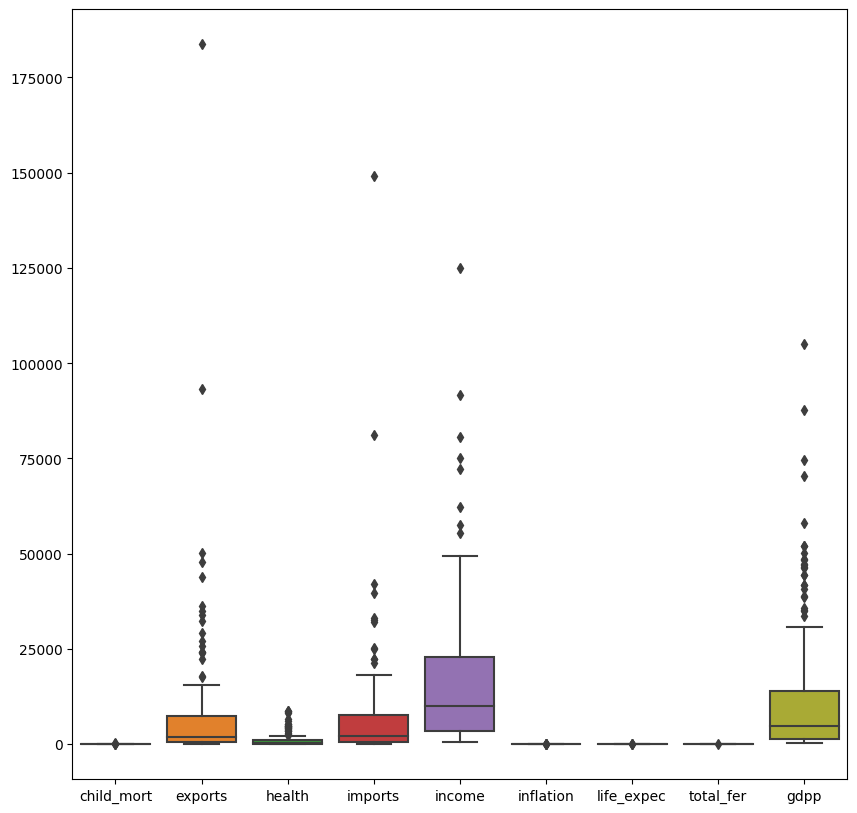

In [663]:
fig = plt.figure(figsize = (10,10))
sns.boxplot(data = country_data)
plt.show()

In [664]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [665]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [666]:
country_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<ipython-input-667-8e72367f529b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(country_data.corr(),annot = True)


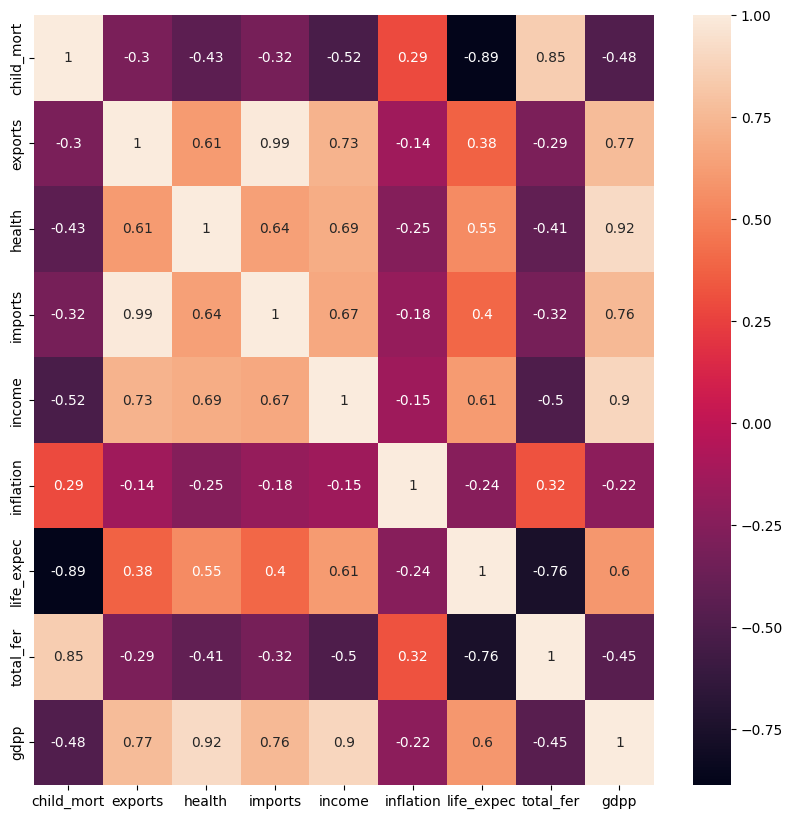

In [667]:
plt.figure(figsize = (10,10))
sns.heatmap(country_data.corr(),annot = True)
plt.show()

In [668]:
from sklearn.preprocessing import StandardScaler
data1 = country_data.drop('country',axis = 1)
standard_scaler = StandardScaler()
data_scaled = standard_scaler.fit_transform(data1)

#PCA

In [669]:
pca = PCA(svd_solver = 'randomized',random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42, svd_solver='randomized')

In [670]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

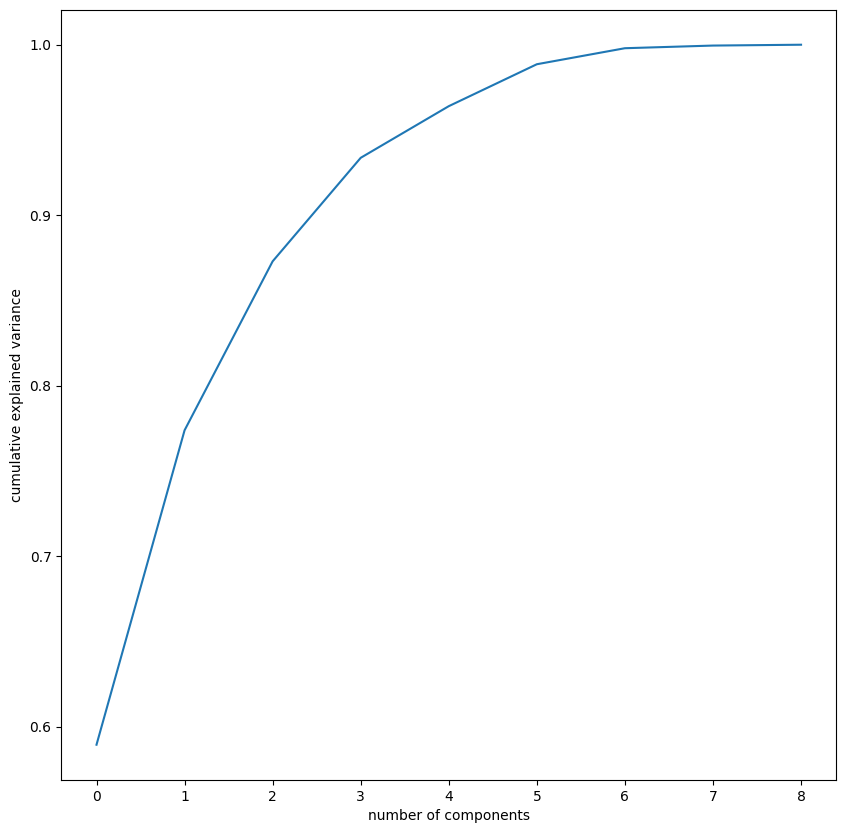

In [671]:
plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [672]:
column_names = list(data1.columns)

In [673]:
column_names

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [674]:
df = pd.DataFrame({'Feature' : column_names,
                   'PC1' : pca.components_[0],
                   'PC2' : pca.components_[1],
                   'PC3' : pca.components_[2],
                   'PC4' : pca.components_[3],
                   'PC5' : pca.components_[4]})
df

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


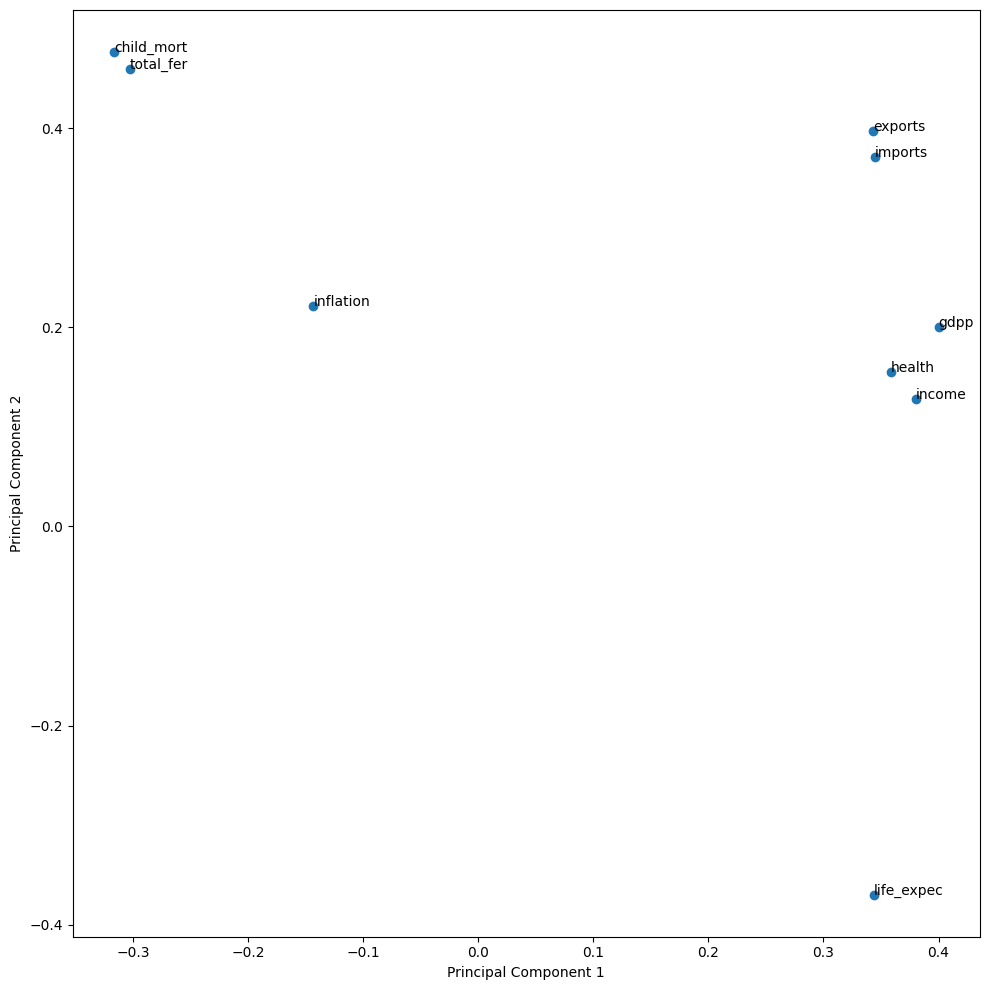

In [675]:
fig = plt.figure(figsize = (10,10))
plt.scatter(df.PC1, df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df.Feature):
  plt.annotate(txt,(df.PC1[i],df.PC2[i]))
plt.tight_layout()
plt.show()

In [676]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 5)

In [677]:
df_pca = pca_final.fit_transform(data_scaled)
df_pca.shape

(167, 5)

In [678]:
data_scaled.shape

(167, 9)

In [679]:
df_pca.shape

(167, 5)

In [680]:
df_pca1 = pd.DataFrame(df_pca)

In [681]:
df_pca1

,0,1,2,3,4
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,-1.802840,0.584669,1.179551,0.051510,-0.274608


In [682]:
df_pca1.corr()

,0,1,2,3,4
0,1.000000,0.000896,-0.000034,-0.003678,-0.003092
1,0.000896,1.000000,0.000074,-0.013777,-0.011749
2,-0.000034,0.000074,1.000000,0.000062,-0.000585
3,-0.003678,-0.013777,0.000062,1.000000,0.047501
4,-0.003092,-0.011749,-0.000585,0.047501,1.000000


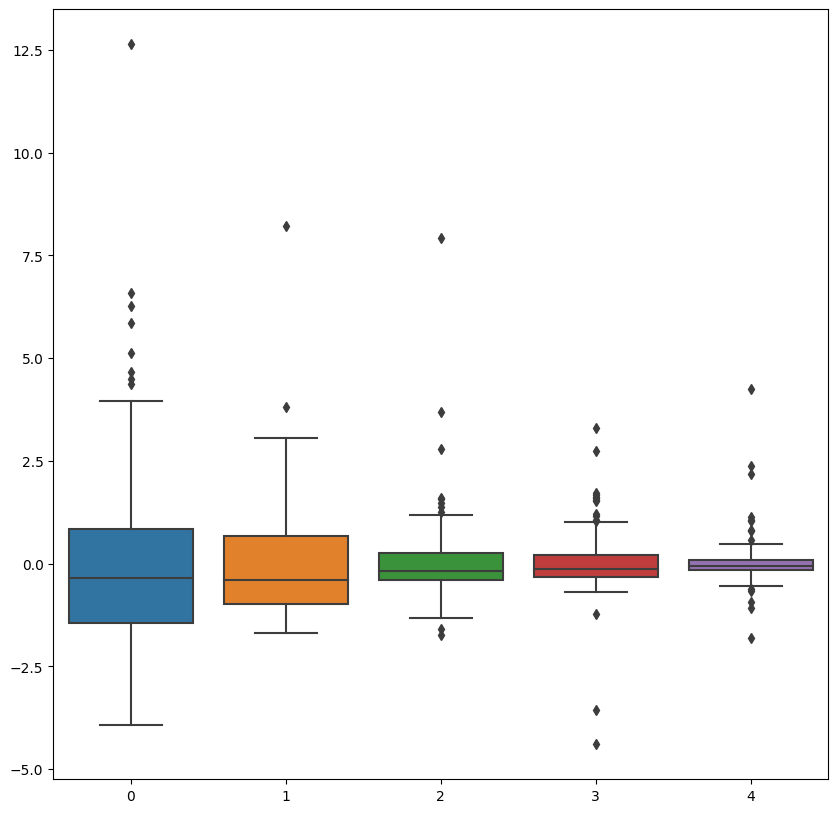

In [683]:
fig = plt.figure(figsize = (10,10))
sns.boxplot(data = df_pca1)
plt.show()

In [684]:
df_pca1.shape

(167, 5)

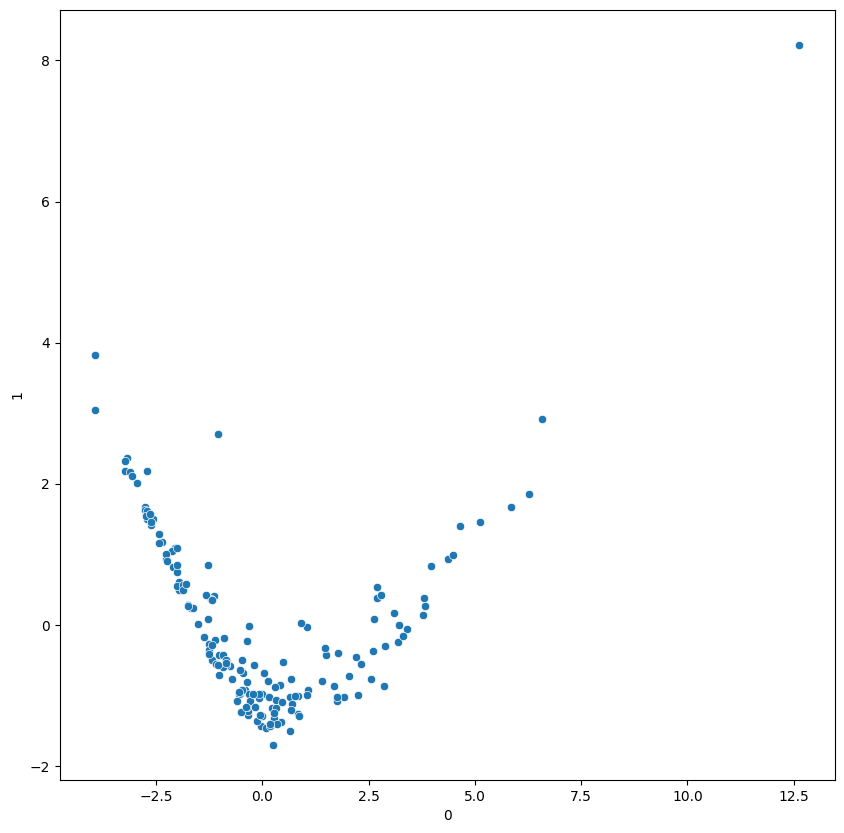

In [685]:
fig = plt.figure(figsize = ( 10,10))
sns.scatterplot(x = 0, y= 1,data = df_pca1)
plt.show()

#Hopkins Statistic

In [686]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
  d = X.shape[1]
  n = len(X)
  m = int(0.1 * n)

  neighbors = NearestNeighbors(n_neighbors = 1).fit(X.values)
  rand_x = sample(range(0,n,1),m)

  u = []
  w = []
  for j in range(m):
    dist_u,_ = neighbors.kneighbors(uniform(np.amin(X,axis = 0),
                                       np.max(X,axis=0),d).reshape(1,-1),
                                       2,return_distance = True)
    u.append(dist_u[0][1])
    dist_w,_ = neighbors.kneighbors(X.iloc[rand_x[j]].values.reshape(1,-1),
                                    2,return_distance = True)
    w.append(dist_w[0][1])

  H = sum(u)/(sum(u) + sum(w))
  if isnan(H):
    H = 0

  return H

In [687]:
df_pca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       167 non-null    float64
 1   1       167 non-null    float64
 2   2       167 non-null    float64
 3   3       167 non-null    float64
 4   4       167 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


In [688]:
hopkins(df_pca1)

0.9275607448102681

In [689]:
df_pca1.shape

(167, 5)

In [690]:
df3 = df_pca1

#Silhouette score

In [691]:
from sklearn.metrics import silhouette_score
sse = []
for k in range(2,10):
  kmeans = KMeans(n_clusters = k).fit(df3)
  sse.append([k,silhouette_score(df3, kmeans.labels_)])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

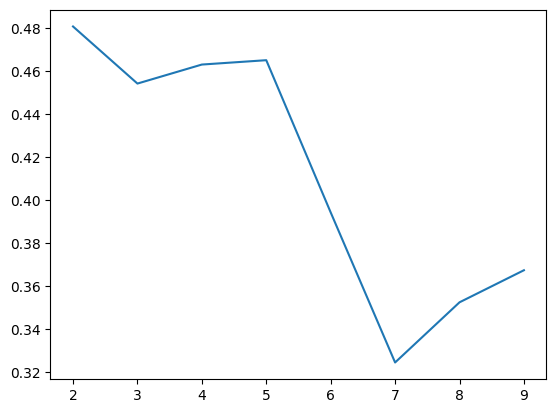

In [692]:
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1])
plt.show()

#Elbow plot

In [693]:
temp = []
for num_clusters in range(1,10):
  model = KMeans(n_clusters = num_clusters,max_iter = 50)
  model.fit(df3)
  temp.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

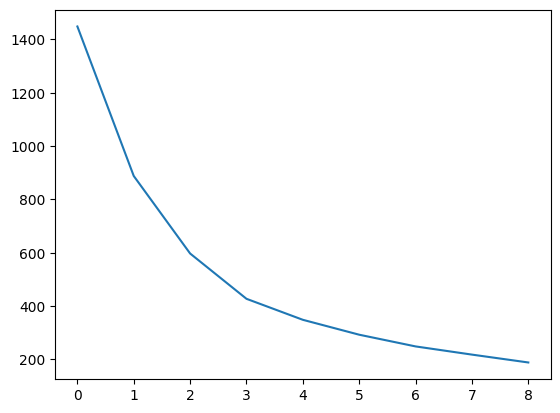

In [694]:
plt.plot(temp)
plt.show()

#K-Means Clustering

In [695]:
model1 = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
model1.fit(df3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3, random_state=50)

In [696]:
df3

,0,1,2,3,4
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,-1.802840,0.584669,1.179551,0.051510,-0.274608


In [697]:
df3['cluster_no'] = model1.labels_

In [698]:
df3

,0,1,2,3,4,cluster_no
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1
...,...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,1
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066,1
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132,1
165,-1.802840,0.584669,1.179551,0.051510,-0.274608,2


In [699]:
df3['cluster_no'].value_counts()

1    91
2    48
0    28
Name: cluster_no, dtype: int64

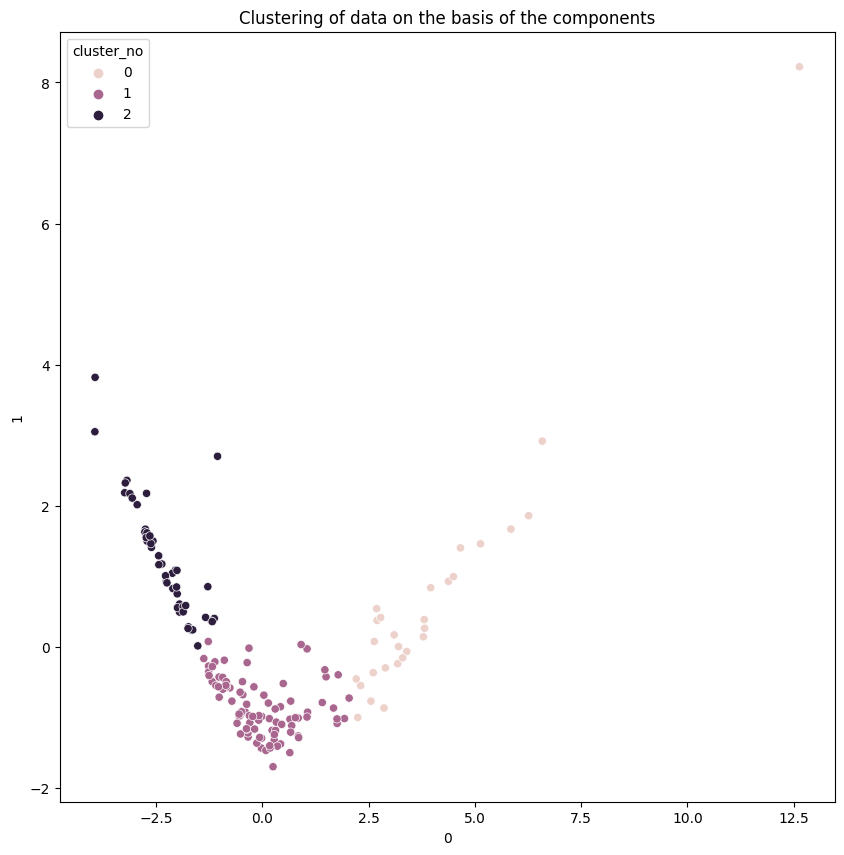

In [700]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(x=0,y=1,hue = 'cluster_no',data = df3)
plt.title('Clustering of data on the basis of the components')
plt.show()

In [701]:
print(country_data.shape)
print(df3.shape)

(167, 10)
(167, 6)


In [702]:
df3

,0,1,2,3,4,cluster_no
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1
...,...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,1
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066,1
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132,1
165,-1.802840,0.584669,1.179551,0.051510,-0.274608,2


In [703]:
data = country_data
data['cluster_no'] = df3['cluster_no']

In [704]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,2


In [705]:
gdpp_mean = pd.DataFrame(data.groupby(['cluster_no']).gdpp.mean())
child_mort_mean = pd.DataFrame(data.groupby(['cluster_no']).child_mort.mean())
exports_mean = pd.DataFrame(data.groupby(['cluster_no']).exports.mean())
health_mean = pd.DataFrame(data.groupby(['cluster_no']).health.mean())
imports_mean = pd.DataFrame(data.groupby(['cluster_no']).imports.mean())
income_mean = pd.DataFrame(data.groupby(['cluster_no']).income.mean())
inflation_mean = pd.DataFrame(data.groupby(['cluster_no']).inflation.mean())
life_expec_mean = pd.DataFrame(data.groupby(['cluster_no']).life_expec.mean())
total_fer_mean = pd.DataFrame(data.groupby(['cluster_no']).total_fer.mean())

In [706]:
child_mort_mean

,child_mort
cluster_no,
0,5.046429
1,20.357143
2,91.610417


In [707]:
mean_df = pd.concat([gdpp_mean,child_mort_mean,income_mean,exports_mean,health_mean,imports_mean,inflation_mean,life_expec_mean,total_fer_mean],axis = 1)
mean_df.columns = ["GDPP","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]

In [708]:
mean_df

,GDPP,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
cluster_no,,,,,,,,,
0,48114.285714,5.046429,50178.571429,31038.239286,4327.163214,25818.100000,3.014679,80.514286,1.760714
1,7979.912088,20.357143,13968.021978,3604.149434,547.279455,3710.446386,7.070549,73.460440,2.235055
2,1909.208333,91.610417,3897.354167,879.063521,114.821765,827.028771,11.911146,59.239583,4.992083


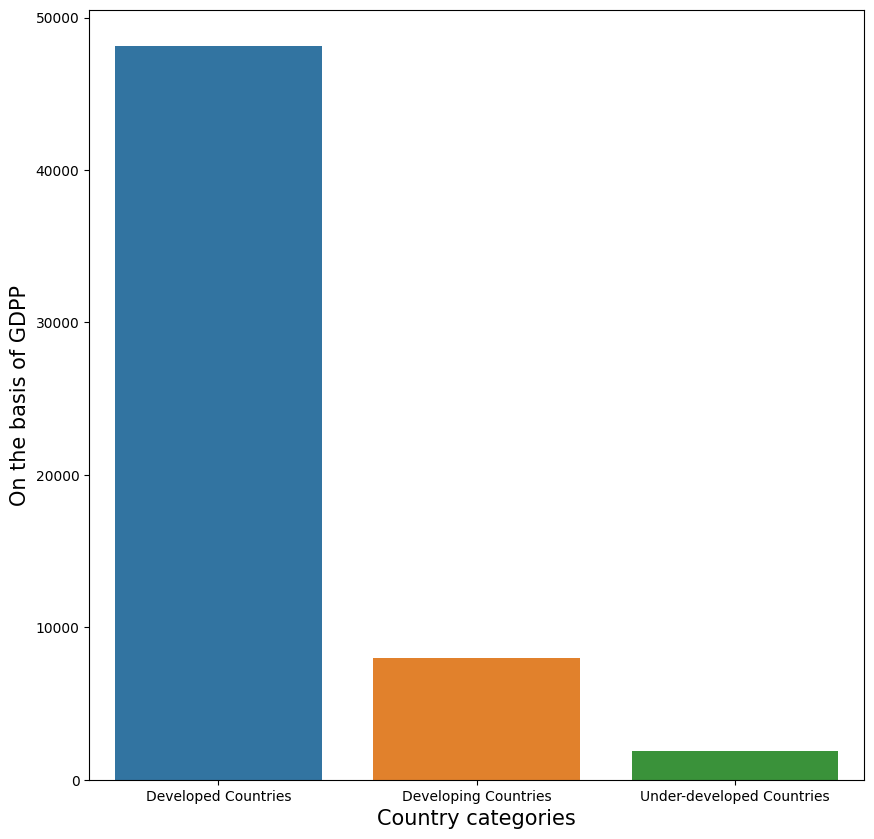

In [709]:
fig = plt.figure(figsize=(10,10))
mean_df.rename(index = {0:'Developed Countries'},inplace = True)
mean_df.rename(index = {1:'Developing Countries'},inplace = True)
mean_df.rename(index = {2:'Under-developed Countries'},inplace = True)
sns.barplot(x = mean_df.index,y='GDPP',data = mean_df)
plt.xlabel('Country categories',fontsize = 15)
plt.ylabel('GDP per Capita',fontsize = 15)
plt.ylabel("On the basis of GDPP")
plt.show()

In [710]:
mean_df

,GDPP,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
cluster_no,,,,,,,,,
Developed Countries,48114.285714,5.046429,50178.571429,31038.239286,4327.163214,25818.100000,3.014679,80.514286,1.760714
Developing Countries,7979.912088,20.357143,13968.021978,3604.149434,547.279455,3710.446386,7.070549,73.460440,2.235055
Under-developed Countries,1909.208333,91.610417,3897.354167,879.063521,114.821765,827.028771,11.911146,59.239583,4.992083


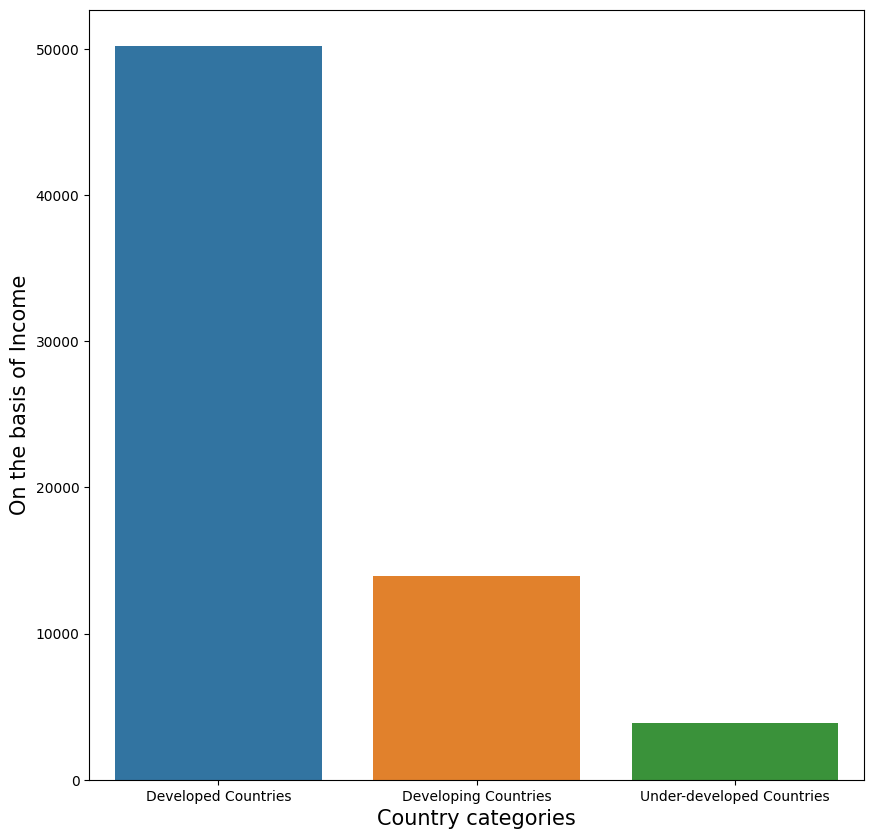

In [711]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x = mean_df.index,y='income',data = mean_df)
plt.xlabel('Country categories',fontsize = 15)
plt.ylabel('Income',fontsize = 15)
plt.ylabel("On the basis of Income")
plt.show()

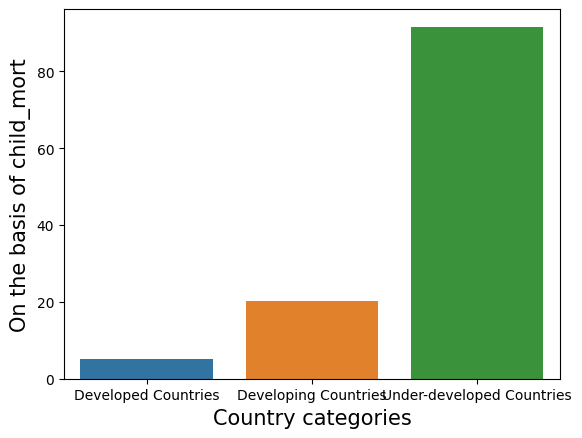

In [712]:
sns.barplot(x = mean_df.index,y='child_mort',data = mean_df)
plt.xlabel('Country categories',fontsize = 15)
plt.ylabel('Child_mort',fontsize = 15)
plt.ylabel("On the basis of child_mort")
plt.show()

In [713]:
bin = data[(data['gdpp'] <= 1909) & (data['child_mort']>=92) & (data['income'] <= 3897.35)]

In [714]:
bin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,2


In [715]:
bin.shape

(17, 11)

In [716]:
bin_gdpp = bin.copy()

In [717]:
bin_gdpp.sort_values(by='gdpp',inplace = True)

In [718]:
bin_gdpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,2
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662,2


In [719]:
bin_top8_gdpp = bin_gdpp[0:8]

In [720]:
bin_top8_gdpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2


In [721]:
bin_income = bin.copy()
bin_income.sort_values(by='income',inplace = True)
bin_top_low8_income = bin_income[0:8]

In [722]:
bin_top_low8_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2


In [723]:
bin_child_mort = bin.copy()
bin_child_mort.sort_values(by='child_mort',inplace = True,ascending = False)
bin_top_high8_child_mort = bin_child_mort[0:8]

In [724]:
bin_top_high8_child_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2


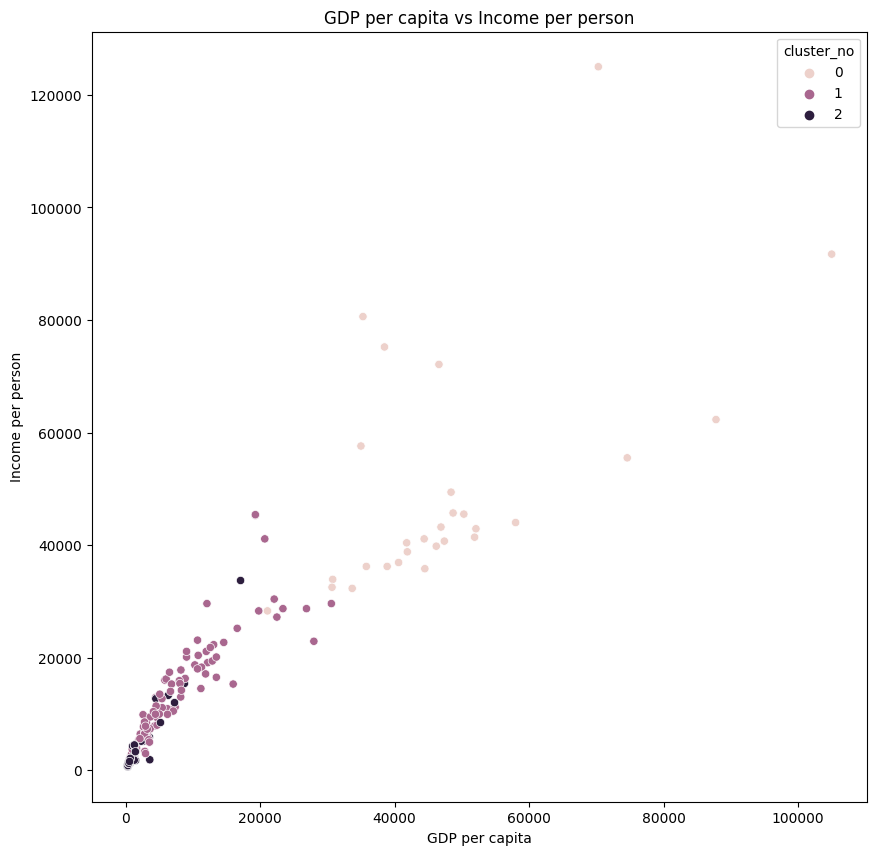

In [725]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(x='gdpp', y ='income', hue = 'cluster_no', data = data)
plt.xlabel('GDP per capita', fontsize = 10)
plt.ylabel('Income per person', fontsize = 10)
plt.title('GDP per capita vs Income per person')
plt.show()

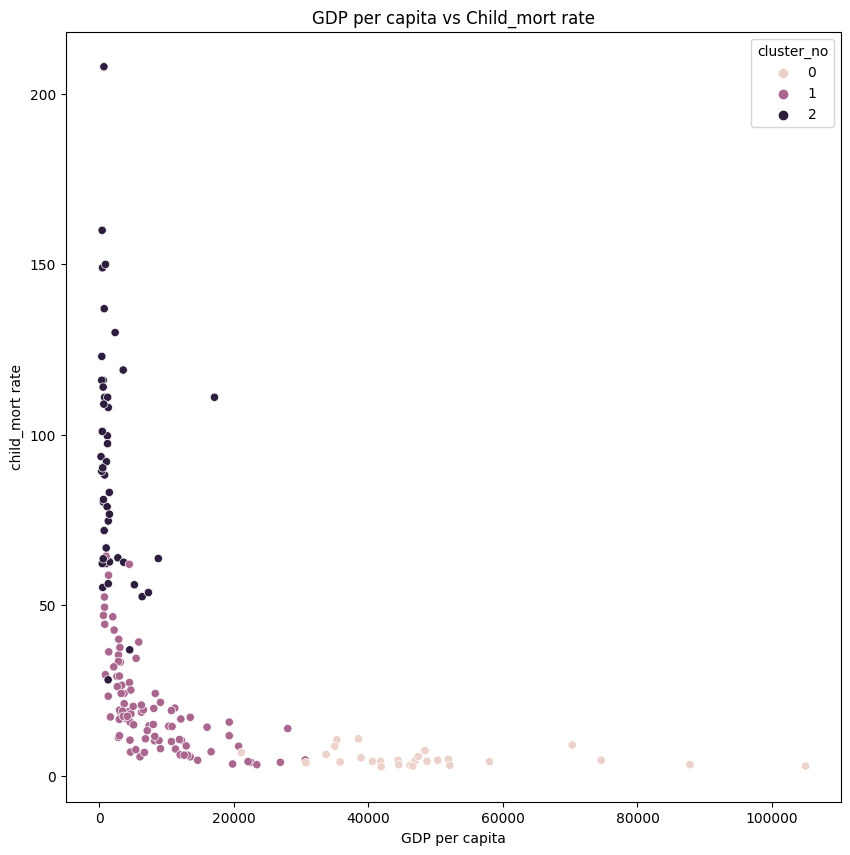

In [726]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(x='gdpp', y ='child_mort', hue = 'cluster_no', data = data)
plt.xlabel('GDP per capita', fontsize = 10)
plt.ylabel('child_mort rate', fontsize = 10)
plt.title('GDP per capita vs Child_mort rate')
plt.show()

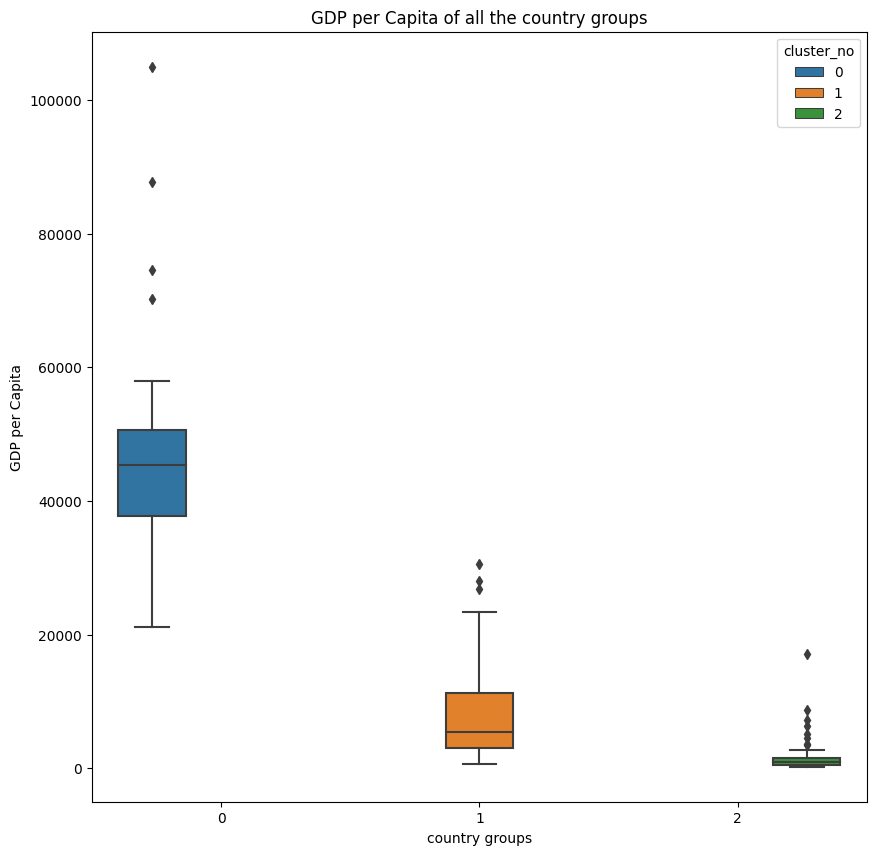

In [727]:
fig = plt.figure(figsize = (10,10))
sns.boxplot(x='cluster_no', y ='gdpp', hue = 'cluster_no', data = data)
plt.xlabel('country groups', fontsize = 10)
plt.ylabel('GDP per Capita', fontsize = 10)
plt.title('GDP per Capita of all the country groups')
plt.show()

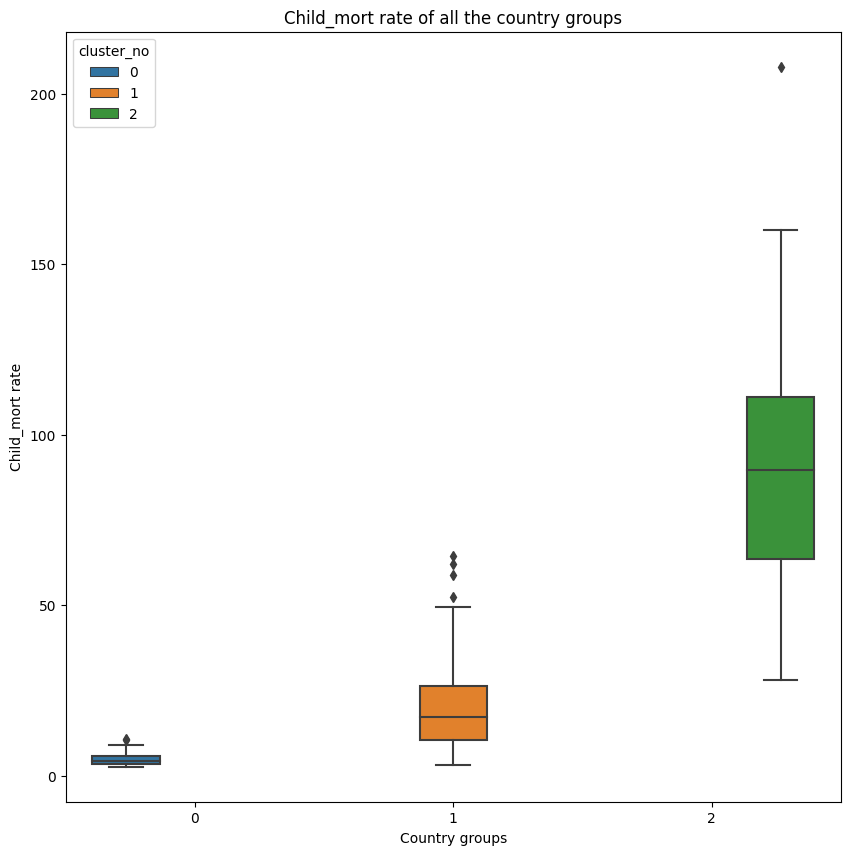

In [728]:
fig = plt.figure(figsize = (10,10))
sns.boxplot(x='cluster_no', y ='child_mort', hue = 'cluster_no', data = data)
plt.xlabel('Country groups', fontsize = 10)
plt.ylabel('Child_mort rate', fontsize = 10)
plt.title('Child_mort rate of all the country groups')
plt.show()

In [729]:
developed_countries = data[data['cluster_no'] == 0]
developing_countries = data[data['cluster_no'] == 1]
under_developed_countries = data[data['cluster_no'] == 2]

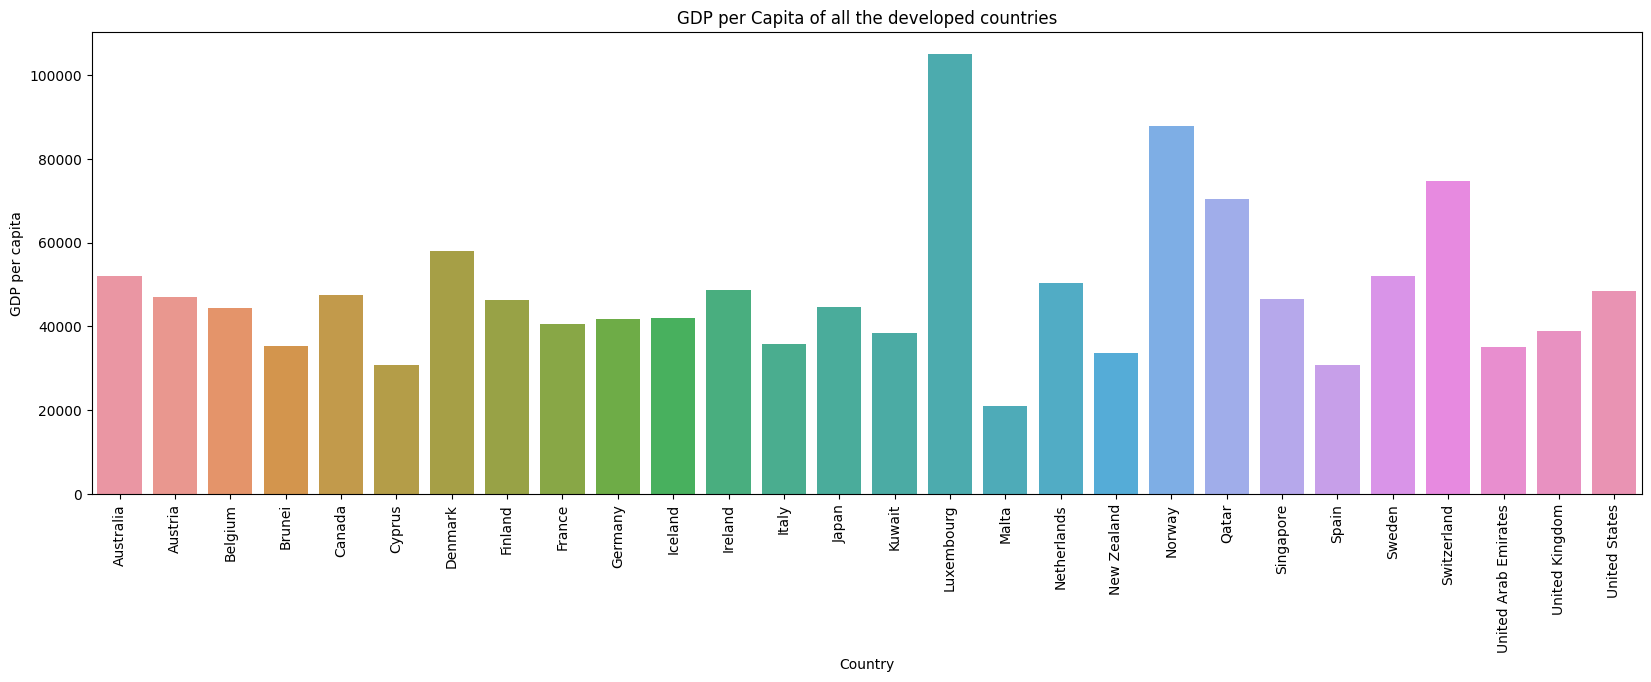

In [730]:
fig = plt.figure(figsize = (20,6))
s = sns.barplot(x = 'country', y='gdpp', data = developed_countries)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.xlabel('Country',fontsize = 10)
plt.ylabel('GDP per capita', fontsize = 10)
plt.title('GDP per Capita of all the developed countries')
plt.show()

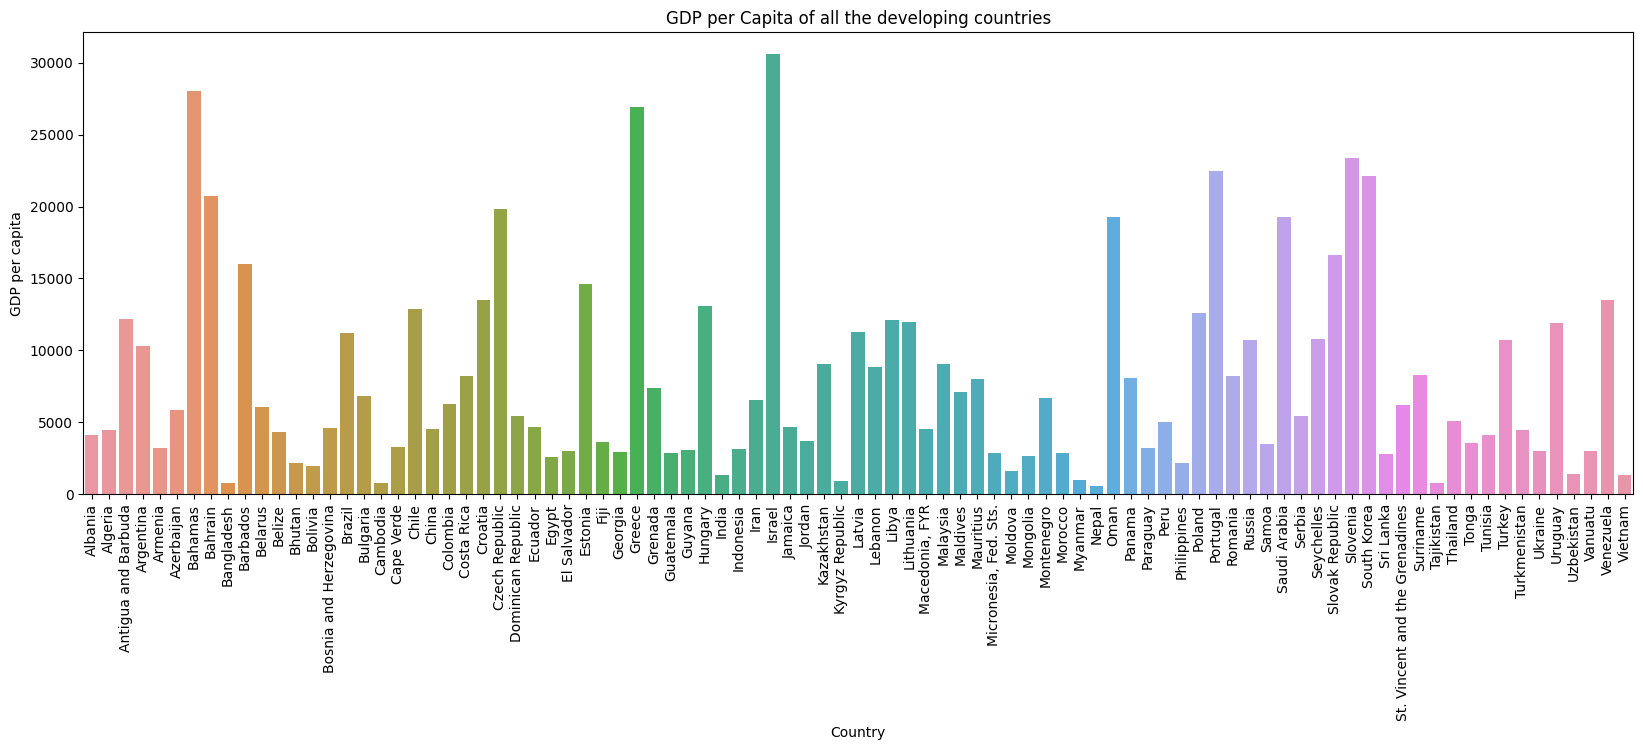

In [731]:
fig = plt.figure(figsize = (20,6))
s = sns.barplot(x = 'country', y='gdpp', data = developing_countries)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.xlabel('Country',fontsize = 10)
plt.ylabel('GDP per capita', fontsize = 10)
plt.title('GDP per Capita of all the developing countries')
plt.show()

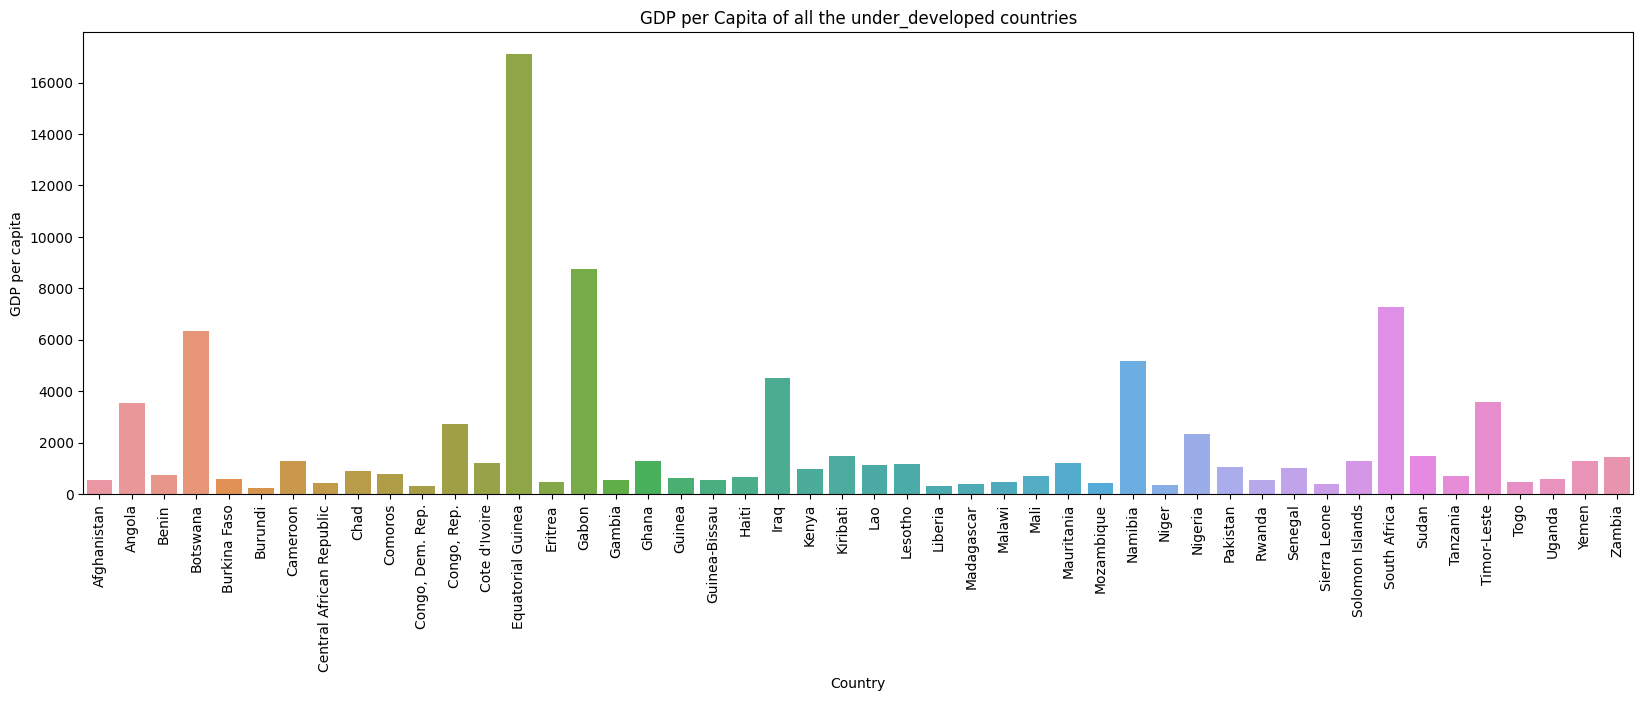

In [732]:
fig = plt.figure(figsize = (20,6))
s = sns.barplot(x = 'country', y='gdpp', data = under_developed_countries)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.xlabel('Country',fontsize = 10)
plt.ylabel('GDP per capita', fontsize = 10)
plt.title('GDP per Capita of all the under_developed countries')
plt.show()

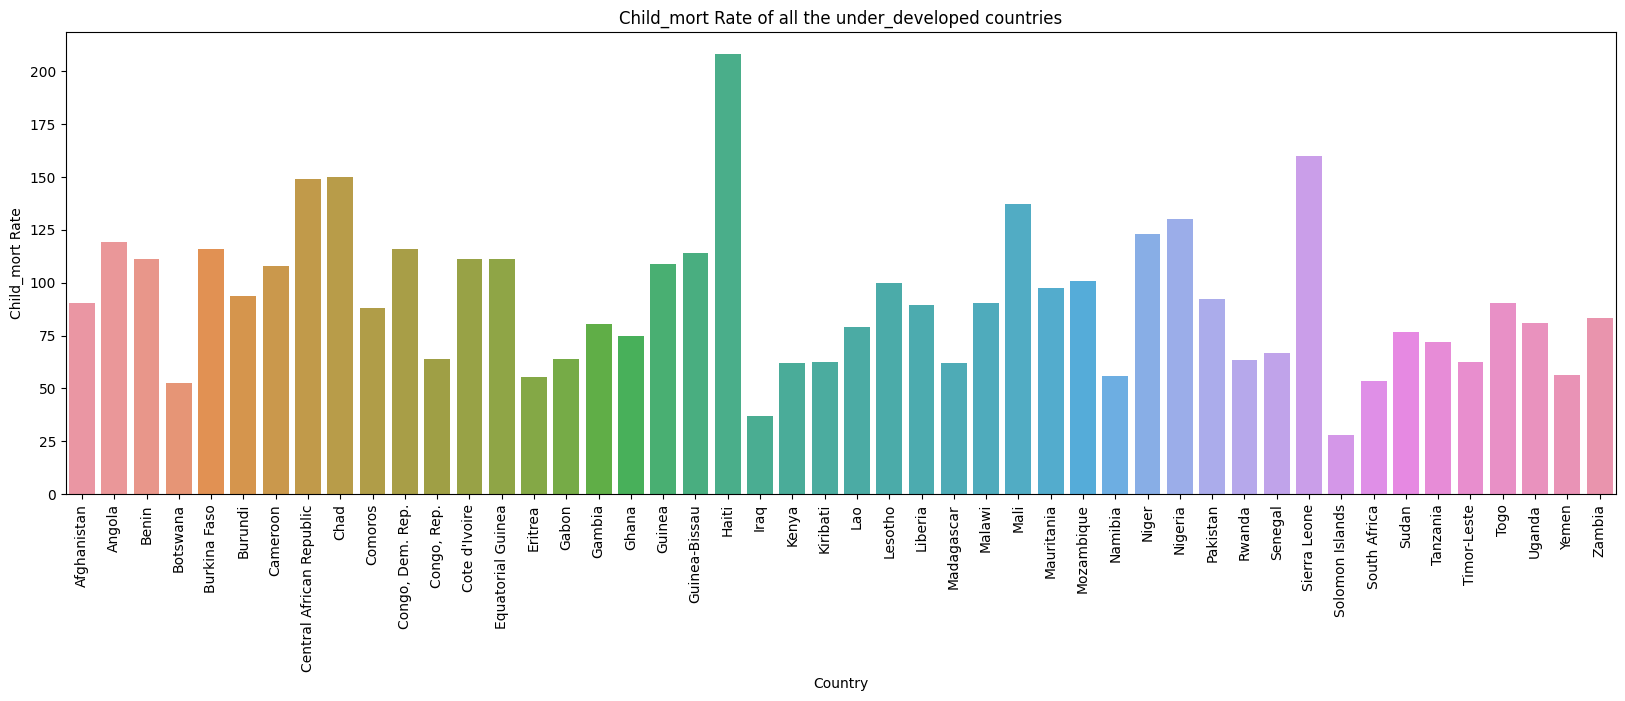

In [733]:
fig = plt.figure(figsize = (20,6))
s = sns.barplot(x = 'country', y='child_mort', data = under_developed_countries)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Child_mort Rate', fontsize = 10)
plt.title('Child_mort Rate of all the under_developed countries')
plt.show()

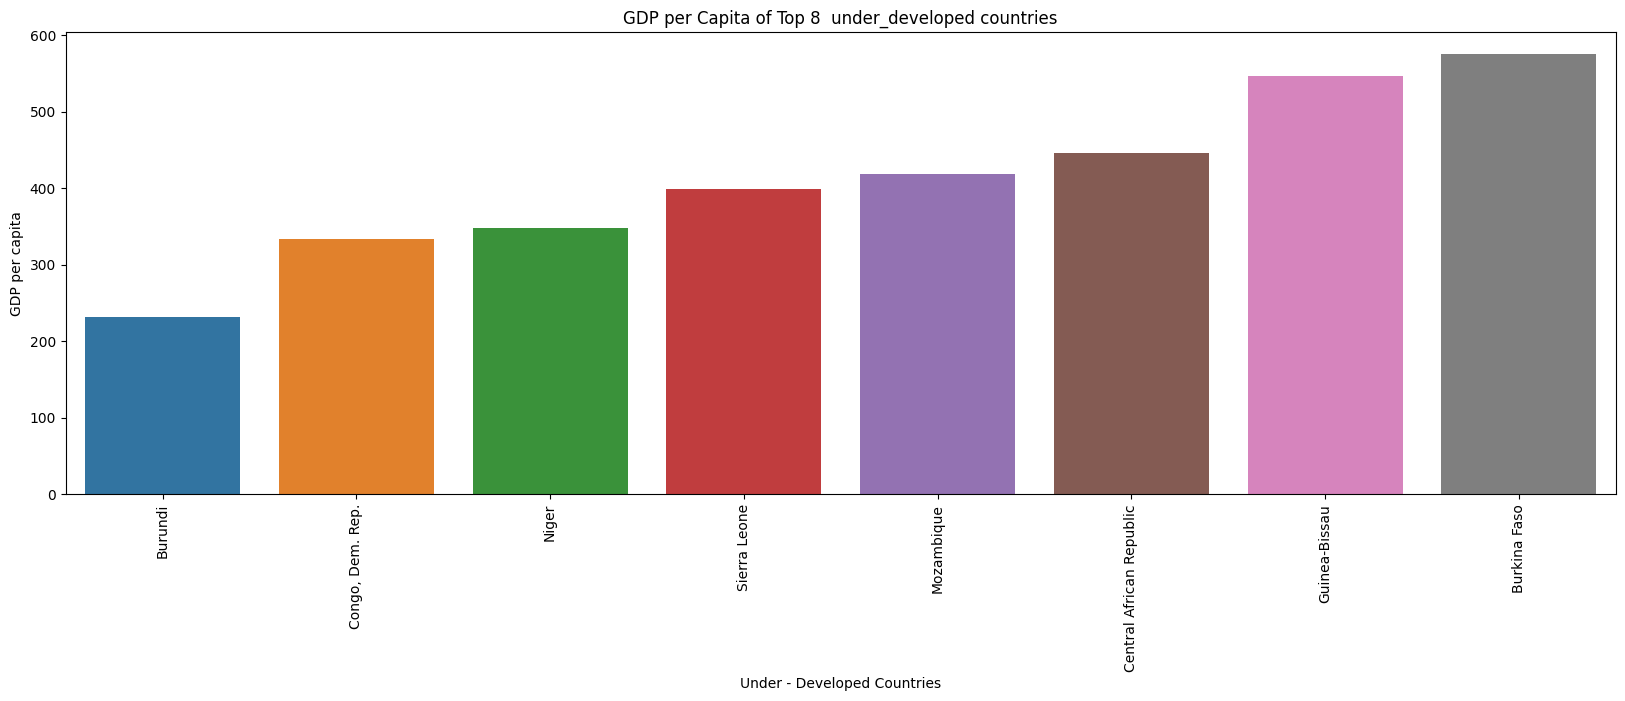

In [734]:
fig = plt.figure(figsize = (20,6))
s = sns.barplot(x = 'country', y='gdpp', data = bin_top8_gdpp)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.xlabel('Under - Developed Countries',fontsize = 10)
plt.ylabel('GDP per capita', fontsize = 10)
plt.title('GDP per Capita of Top 8  under_developed countries')
plt.show()

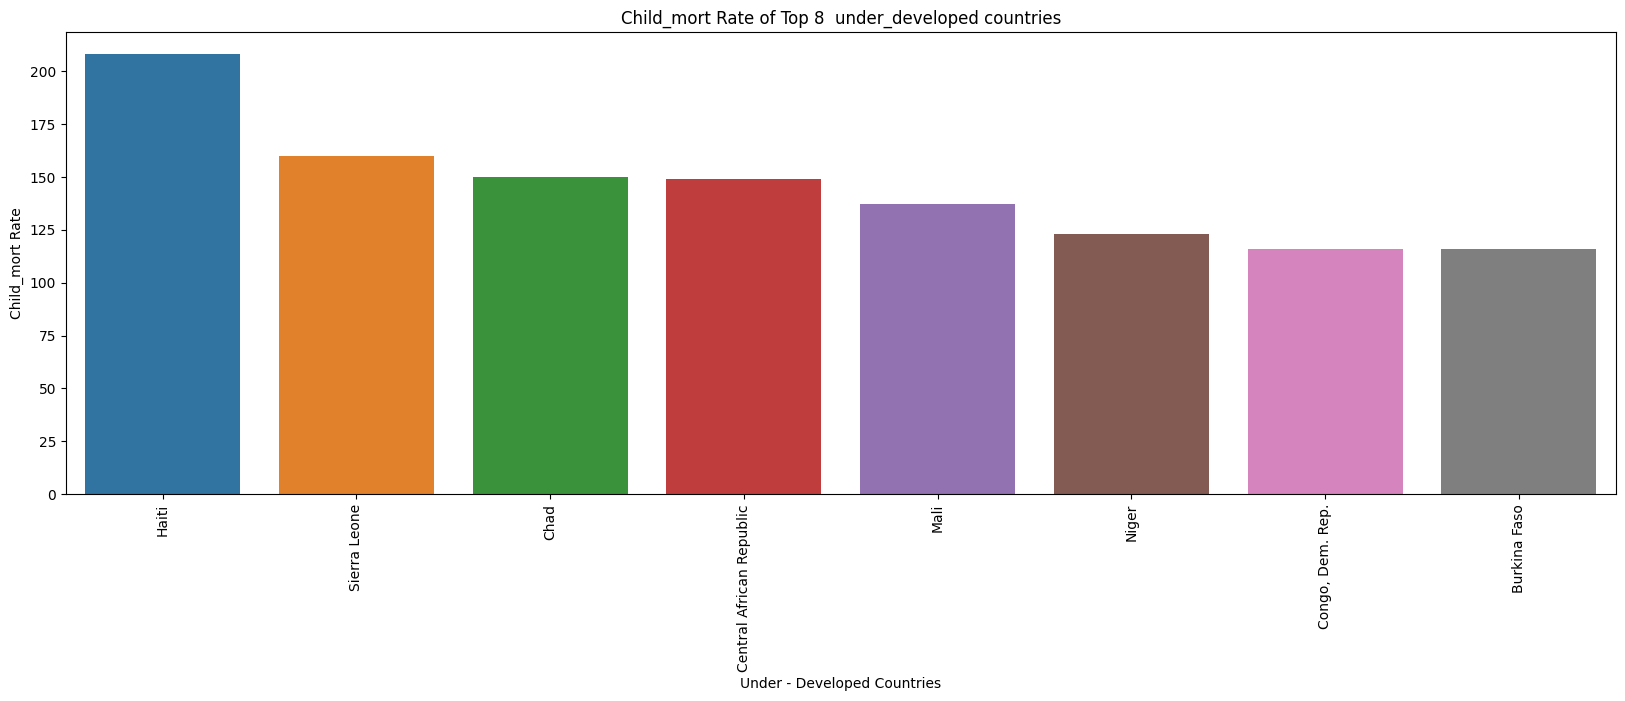

In [735]:
fig = plt.figure(figsize = (20,6))
s = sns.barplot(x = 'country', y='child_mort', data = bin_top_high8_child_mort)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.xlabel('Under - Developed Countries',fontsize = 10)
plt.ylabel('Child_mort Rate', fontsize = 10)
plt.title('Child_mort Rate of Top 8  under_developed countries')
plt.show()

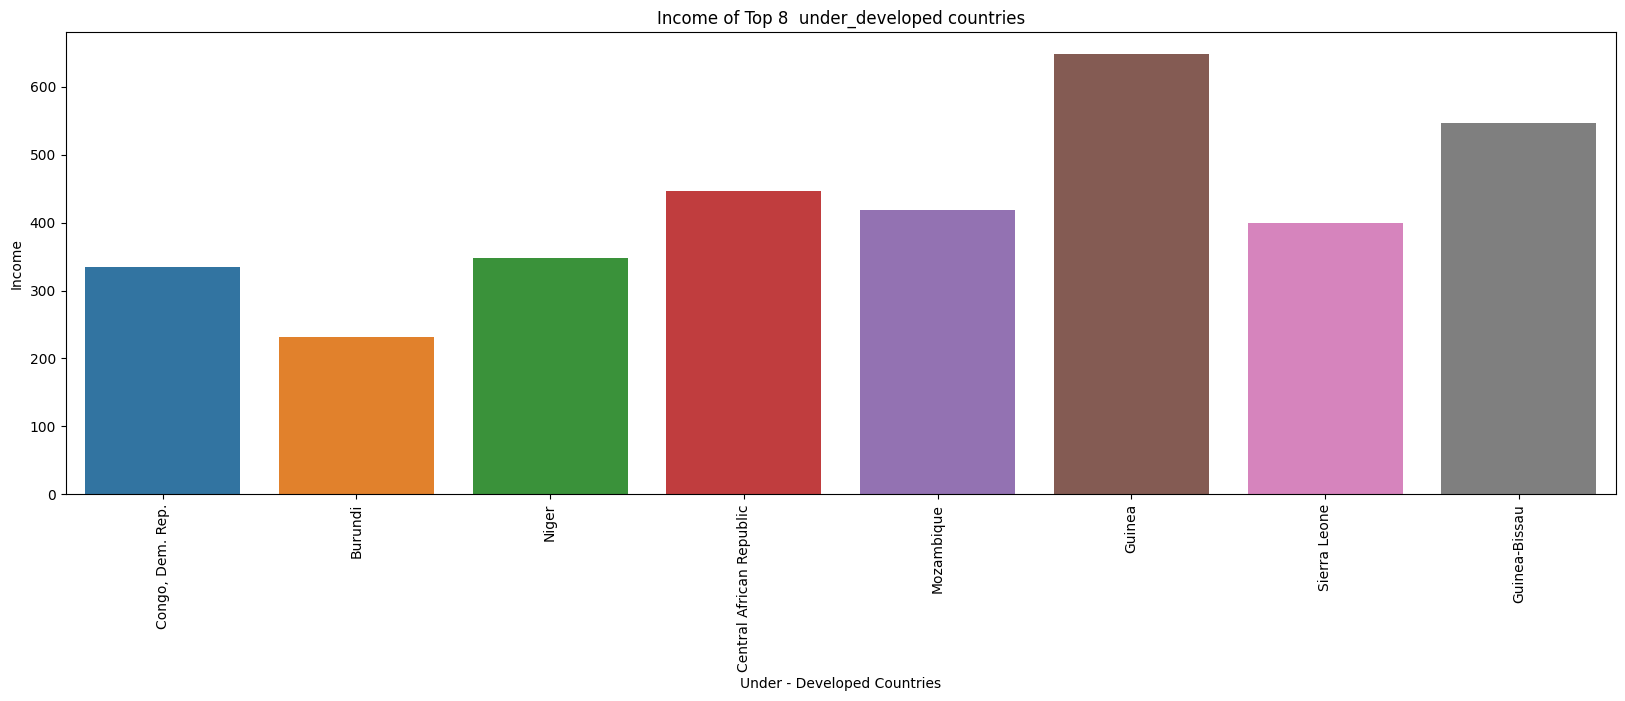

In [736]:
fig = plt.figure(figsize = (20,6))
s = sns.barplot(x = 'country', y='gdpp', data = bin_top_low8_income)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.xlabel('Under - Developed Countries',fontsize = 10)
plt.ylabel('Income', fontsize = 10)
plt.title('Income of Top 8  under_developed countries')
plt.show()

In [737]:
df3.shape

(167, 6)

In [738]:
pc_df3 = df3.drop(['cluster_no'],axis = 1)

In [739]:
pc_df3

,0,1,2,3,4
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,-1.802840,0.584669,1.179551,0.051510,-0.274608


#Hierarchical Clustering

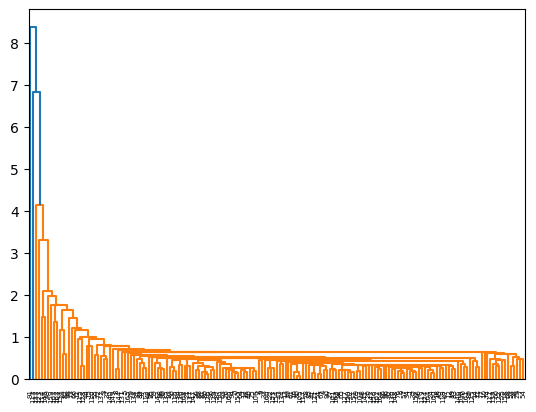

In [740]:
mergings = linkage(pc_df3, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

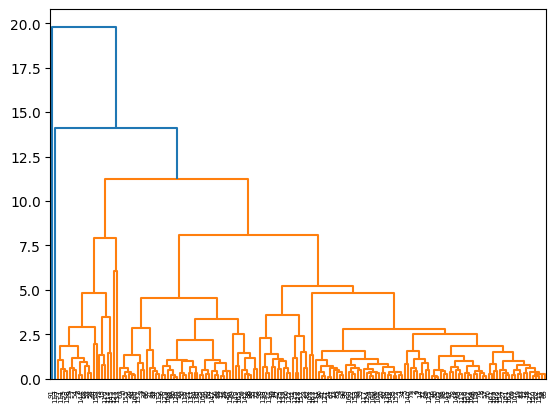

In [741]:
mergings1 = linkage(pc_df3,method = 'complete', metric = 'euclidean')
dendrogram(mergings1)
plt.show()

In [742]:
cut_tree(mergings1,n_clusters = 3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [743]:
cluster_no_h = cut_tree(mergings1,n_clusters = 3).reshape(-1,)
cluster_no_h

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [744]:
pc_df3['cluster_no_h'] = cluster_no_h

In [745]:
pc_df3

,0,1,2,3,4,cluster_no_h
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0
...,...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,0
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066,0
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132,0
165,-1.802840,0.584669,1.179551,0.051510,-0.274608,0


In [746]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,2


In [747]:
data3 = pd.merge(data,pc_df3,left_index = True,right_index = True)
data3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no,0,1,2,3,4,cluster_no_h
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [748]:
data3.drop([0,1,2,3,4],axis = 1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no,cluster_no_h
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,1,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,1,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1,0
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,2,0


In [749]:
data3['cluster_no_h'].value_counts()

0    165
1      1
2      1
Name: cluster_no_h, dtype: int64

In [750]:
cluster_gdpp_h = pd.DataFrame(data3.groupby(['cluster_no_h']).gdpp.mean())
cluster_child_mort_h = pd.DataFrame(data3.groupby(['cluster_no_h']).child_mort.mean())
cluster_income_h = pd.DataFrame(data3.groupby(['cluster_no_h']).income.mean())

In [751]:
df_h = pd.concat([cluster_gdpp_h,cluster_child_mort_h,cluster_income_h],axis = 1)

In [752]:
df_h.columns = ["GDPP","child_mort","income"]
df_h

,GDPP,child_mort,income
cluster_no_h,,,
0,12470.812121,37.929091,16765.533333
1,105000.000000,2.800000,91700.000000
2,2330.000000,130.000000,5150.000000


In [753]:
final_gdpp_h = data[data['gdpp']<=2330.000000]
final_child_mort_h = data[data['child_mort']>=130.000000]
final_income_h = data[data['income']<=5150.000000]

In [754]:
final = data[(data['gdpp']<=2330.000000) & (data['child_mort']>=130.000000) & (data['income']<=5150.000000)]

In [755]:
final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2


In [756]:
final_gdpp_h.sort_values(by='gdpp')[0:8]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2


In [757]:
final.shape

(6, 11)

<Axes: xlabel='cluster_no_h', ylabel='gdpp'>

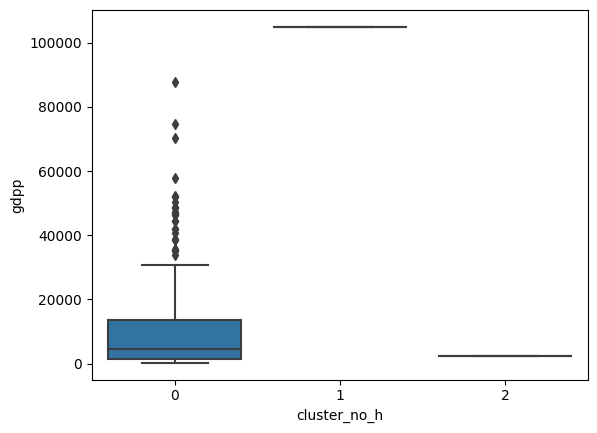

In [758]:
sns.boxplot(x='cluster_no_h', y='gdpp', data=data3)

<Axes: xlabel='cluster_no_h', ylabel='child_mort'>

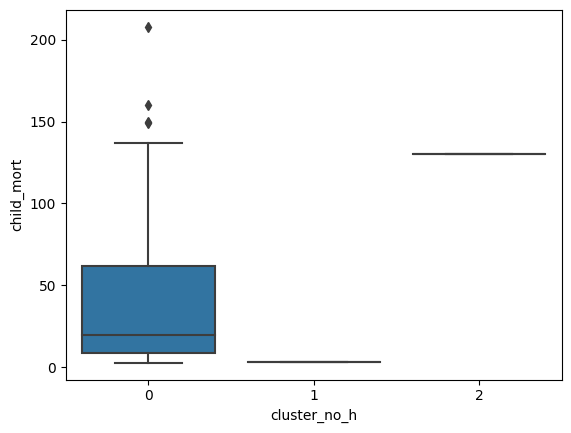

In [759]:
sns.boxplot(x='cluster_no_h', y='child_mort', data=data3)

<Axes: xlabel='cluster_no_h', ylabel='income'>

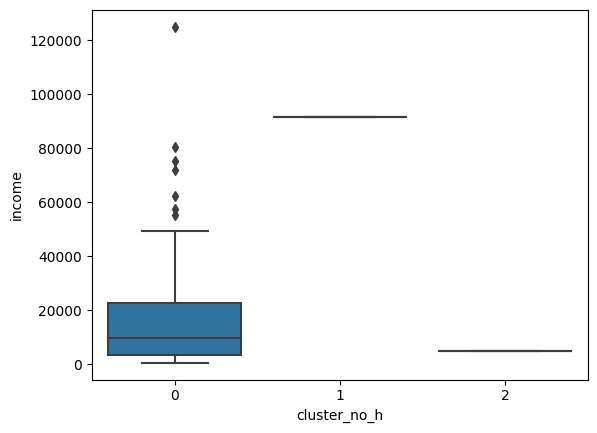

In [760]:
sns.boxplot(x='cluster_no_h', y='income', data=data3)